# Project: Analyze Titanic Data Survival Rate


## 1. Introduction

For this project, I will conduct my data analysis on Titanic dataset for exploring the survival situation and finding out what sorts of people were likely to survive and what features of the passengers made people more likely to survive the tragedy.


#### Dataset
According to Kaggle Competition Website, the Titanic dataset includes demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic. More detailed descriptive summary of the dataset will be elaborating later. 



#### Questions
What factors made people more likely to survive? In specific, what kind of variables contribute to a higher survival rate? 



#### Import the Moduls and Read the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
# read the file
titanic = pd.read_csv('titanic-data.csv')

## 2. Initial Exploration

First, let's take a broad overview of the dataset, checking the types and the typical content in data


In [3]:
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
# Check the data types
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### Variables Description
- PassengerId -- is the ordinal ID for each passenger.
- Survived -- 1 if the passenger survived, and 0 if they did not.
- Pclass -- the passenger's cabin class from 1 to 3 where 1 was the highest class.
- Name -- full name of the passenger.
- Sex -- the passenger's gender, male and female.
- Age -- The passenger's age, in integer format.
- SibSp -- ordinal integer describing the number of siblings or spouses travelling with each passenger.
- Parch -- ordinal integer describing the number of parents or children travelling with each passenger.
- Ticket -- the ticket number, in string format.
- Fare -- the amount the passenger paid for their ticket.
- Cabin -- the cabin number of each passenger.
- Embarked -- Either C, Q, or S, to indicate which port the passenger boarded the ship from.


### Notes
- It shows that we have two floating point variables (Age and Fare), five string features (Name, Sex, Embarked, Ticket, Cabin), and five integer features (PassengerId, Survived, Pclass, SibSp, Parch).


- From the first 10 rows of the table, we can see many of the columns, such as Age and Cabin, having missing values. Thus, we need to deal with the missing data before conducting analysis.



###  Missing Values

In [5]:
# check the count of missing values by columns
print(titanic.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [6]:
len(titanic['Age'])

891

- In the dataset, most Cabin numbers are missing, together with 177 Age values and 2 Embarked values.


- The count of missing values plays a vital role in defining the validity of making inferences. Thus, any analysis based on the columns with missing data will either have to be removed from the analysis or need to be highlighted and requires special considerations. 


- In this dataset, the effect values of Age include 714 rows (891/177) and Embarked are 889 rows (891/2) so they could be used in the further analysis after cleaning. However, the Cabin miss lots of data (687/891), this variable makes no sense in any analysis.


In [7]:
# get the effect values

Age_is_null = pd.isnull(titanic["Age"])
New_Age = titanic['Age'][Age_is_null == False]
print(len(New_Age))

Embarked_is_null = pd.isnull(titanic['Embarked'])
New_Embarked = titanic['Embarked'][Embarked_is_null == False]
print(len(New_Embarked))


714
889


## 3. Analyze Survival Rate by Visualizing Data

### Research Hypotheses and Workflow

According to the Titanic Movie and related Wikipedia page (https://en.wikipedia.org/wiki/Women_and_children_first), a code of conduct "Women and children first" is most famously associated with the sinking of RMS Titanic in 1912. For this reason, I’d like to make a rough assumption that the age and gender factors are highly correlated to the survival rate. That is, the children (Age <? ) and women (Sex = female) are more likely had a higher survival rate.

Also, the variable of Pclass stands for a proxy for socio-economic status (SES), I make another reasonable assumption that the upper-class passengers (Pclass=1) could get more resource and thus a better chance to survive in a disaster. Even though I made these assumptions, other variables will still be examined for getting a full understanding of the survival rate. 

Thus, my workflow:

- Starts with calculating the overall survival rate and define a function to examine the correlation between each variable and survival rate. 


- Second, I will analyze how each variable is affecting the survival chance by visualizing the results.  


- Third, I will also investigate the correlation between variables to see how related one feature is to the next. 


- Last, I will make a conclusion based on all the data analysis results. 


### Filtering effective independent variables

The Titanic dataset has 12 columns; the 'Survived' is dependent variable while others could be treated as an independent variable. However, some of the independent variables are not effective in analyzing the survival rate. 


1.	Cabin feature may be dropped as it is highly incomplete or contains many null values as I discussed in the “Missing Values” part. 


2.	Ticket feature may be dropped from our analysis as it only an identified number, which may not be a correlation between Ticket and survival.


3.	Similarly, PassengerId may be dropped from training dataset as it’s an ordinal index thus does not contribute to survival.


4.	Name feature is relatively non-standard, may not contribute directly to survival, so maybe dropped.


Thus, in the following analysis, I will only focus on other seven independent variables: Pclass, Sex, Age, SibSp, Parch, Fare, Embarked.



### (1) Overall Survival Rate

In [8]:
survived_rate=float(titanic['Survived'].sum())/titanic['Survived'].count()  
# add the float() to see the exact number

print('The Overall Survived Rate is: ')
print(survived_rate)

The Overall Survived Rate is: 
0.383838383838


In [9]:
# define the function of showing the survived_rate groupby one one varaible 

def survived_rate(x):
    rate = (titanic.groupby([x]).sum()/titanic.groupby([x]).count())['Survived']
    return rate  

### (2) Sex V.S. Survival Rate

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


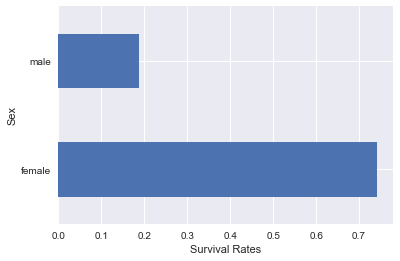

In [11]:
Sex_survived_rate = survived_rate('Sex')
print(Sex_survived_rate)
Sex_survived_rate.plot(kind='barh') # bar graph
plt.xlabel('Survival Rates')
plt.ylabel('Sex')


#### Result: 
From the bar graph we can see, the correlation between the Sex and Survival Rate is very high; the female survival chance is almost 75% while the men’s is merely 19%. This huge difference in survival rate between male and female indicated that female in Titanic were obviously more likely to survive. 


### (3) Pclass V.S. Survival Rate

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


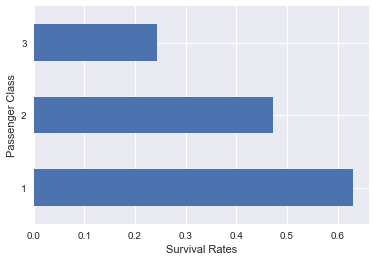

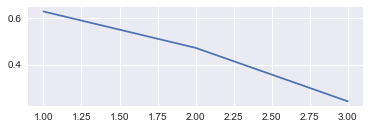

In [12]:
Pclass_survived_rate = survived_rate('Pclass')
print(Pclass_survived_rate)

Pclass_survived_rate.plot(kind='barh')  # bar graph
plt.xlabel('Survival Rates')
plt.ylabel('Passenger Class')

fig = plt.figure()
ax = fig.add_subplot(2,1,1)  
ax.plot(Pclass_survived_rate)    # plot graph

# I made two types visulization to show the relationship more clearly. 

#### Result:
The first bar graph tells that Pclass is also correlated to the survival rate, which confirmed my second assumption that upper-class passengers (Pclass=1) got the best chance (63%) to survive in a disaster and so forth the middle-class passengers (Pclass=2) had good survival rate (47%). On the contrary, the lower-class passengers (Pclass=3) has a low chance to survive, which is only 24%.  

Correspondingly, the second plot graph show a falling survival rate along with the decrease of Pclass level. 



### (4) Age V.S. Survival Rate

In [10]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


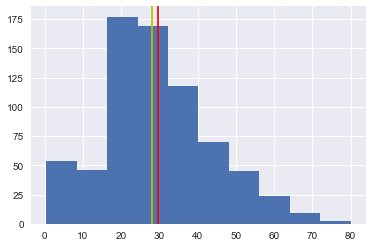

In [25]:
import matplotlib.pyplot as plt
import numpy

plt.hist(titanic['Age'].dropna())

plt.axvline(numpy.median(titanic['Age'].dropna()), color='y') # yellowline:median 
plt.axvline(titanic['Age'].dropna().mean(), color='r')  # redline:mean



In [31]:
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].mean())
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### The questions of Age data

- The minimum age 0.42 is strange. 
- It involves 177 missing data, which was investigated above.
- Thus, before exploring the relationship survived rate and age, I need to conduct data cleaning.
 


In [14]:
# create a new dataset without missing values in Age

new_titanic = titanic.dropna(subset = ['Age'])
print(new_titanic.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          529
Embarked         2
dtype: int64


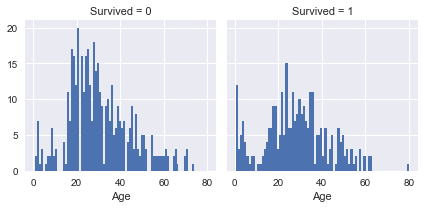

In [15]:
# Make a Seaborn.FacetGrid to show the difference 

g = sns.FacetGrid(new_titanic, col='Survived')
g.map(plt.hist, 'Age', bins=80)


#### Results: 
- Infants (Age <=4) had high survival rate.
- Oldest passengers (Age = 80) survived.
- Large number of 15-25 year olds did not survive.
- Most passengers are in 15-35 age range.

### (5) SibSp & Parch V.S. Survival Rate

In [16]:
SibSp_Survived_rate = survived_rate('SibSp')
print(SibSp_Survived_rate)
Parch_Survived_rate = survived_rate('Parch')
print(Parch_Survived_rate)


SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64
Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64


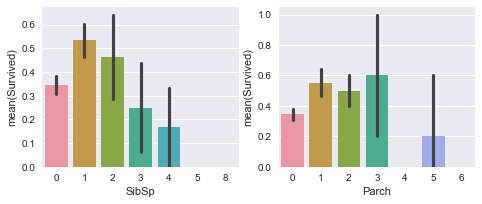

In [17]:
# Data Visulization 

plt.figure(figsize=[12,10])
plt.subplot(331)
sns.barplot('SibSp', 'Survived', data=titanic)
plt.subplot(332)
sns.barplot('Parch', 'Survived', data=titanic)


#### Observation:
- The two charts above both indicated that with one to three relatives or family members received a higher survival rate, no matter with siblings, spouse, parents, or child. 
- For this reason, we can add these two variables together to create a new feature named “FamilySize” to make the analysis easier to understand. 


In [18]:
# FamilySize = Parch (number of parents or children on board) + SibSp (number of siblings or spouses)
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch']
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1


FamilySize
0     0.303538
1     0.552795
2     0.578431
3     0.724138
4     0.200000
5     0.136364
6     0.333333
7     0.000000
10    0.000000
Name: Survived, dtype: float64


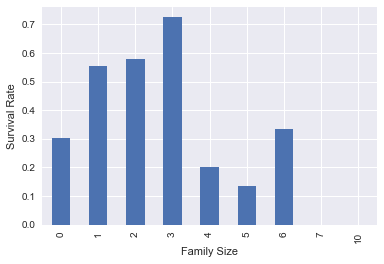

In [19]:
FamilySize_survived_rate = survived_rate('FamilySize')
print(FamilySize_survived_rate)

FamilySize_survived_rate.plot(kind='bar')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')

#### Result:
- Passengers with a decent family size had a good chance of survival. Base on the bar graph above, having 1-2 family members on board, in particular SibSp = 1-2 or Parch = 1-3 got a better survival chance than being alone or having a large family.


### (6) Embarked V.S. Survival Rate
- C = Cherbourg
- Q = Queenstown
- S = Southampton
- Two missing values existed in Embarked variable. Since it is a very small part (2/891) which means no much influence on the basic tendency, I choose to ignore it. 



Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


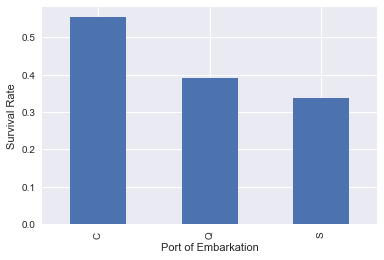

In [20]:
Embarked_Survived_rate = survived_rate('Embarked')
print(Embarked_Survived_rate)
Embarked_Survived_rate.plot(kind='bar')
plt.xlabel('Port of Embarkation')
plt.ylabel('Survival Rate')

#### Result:
- It is clear that embarking at C port resulted in a higher survival rate than port Q and S. There might be a correlation with other variables, such as Pclass or Fare. I will examine that in next part.



## 4. Correlation Among Variables

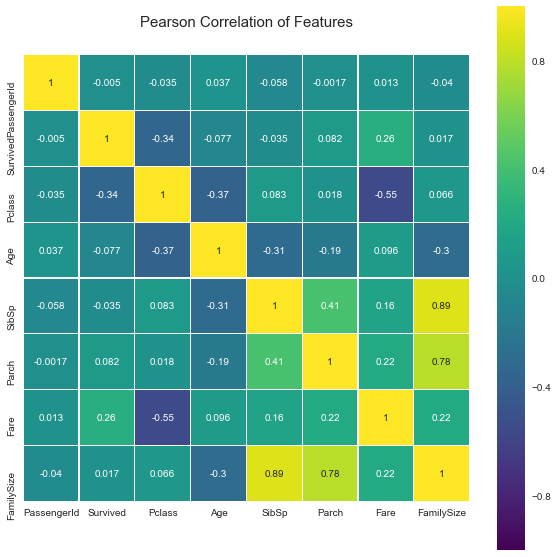

In [21]:
# Make a Pearson Correlation Matrix to check the dependence among variables

colormap = plt.cm.viridis
plt.figure(figsize=(10,10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(titanic.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

### Observations from the Correlation Matrix

The above Pearson Correlation Heatmap generates some correlation plots of the features showing how related one feature is to the next. 

- First, the strongest correlated features are that of Family size and Parch and SibSp, which are 0.89 and 0.78. And so on, the 0.41 between SibSp and Parch. Obviously, the Parch and SibSp together determined how big is the family size, so these two correlations are quite high. But, they’re irrelevant to my study in survival rate.


- Second, the correlation between independent variable (Pclass) and dependent variable (Survived) is negative 0.34, which also confirmed my analysis in last part that the higher Pclass (lower-class passengers) the lower survival rate. 


- Third, there are two effective (> 0.30) correlations relates to the study of survival rate.  One is a strong negative correlation between Fare and Pclass (-0.55), another is a moderate negative correlation between Pclass and Age (-0.37). I will elaborate more on these two relationships in the following. 



#### (1) Calculate Fares by Pclass

In [22]:
passenger_classes = [1, 2, 3]
Fares_by_Pclass = {}
for x in passenger_classes:
    Pclass_rows = titanic[titanic['Pclass'] == x]
    Pclass_Fares = Pclass_rows['Fare']
    Fares_for_Pclass = Pclass_Fares.mean()
    Fares_by_Pclass[x] = Fares_for_Pclass
Fares_by_Pclass

{1: 84.15468749999992, 2: 20.66218315217391, 3: 13.675550101832997}

- The calculation shows that the Fares by Pclass 1 is relative high than others, which confirmed the strong negative correlation between Fares and Pclass (0.55). It is clear that higher passenger class means higher fares. 
 

#### (2) Calculate average Age by Pclass

In [23]:
Average_Age_by_Pclass = new_titanic.pivot_table(index='Pclass',values=['Age'],aggfunc=np.mean)
Average_Age_by_Pclass

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


- The moderate negative correlation between Pclass and Age (0.37) also confirmed in the calculation above. The higher passenger class, the higher average passenger age. It’s also obvious that older people generally have higher socio-economic status. 
 

#### (3) Calculate Fares by Embarked 

In [24]:
Average_Fares_by_Embarked = titanic.pivot_table(index='Embarked',values=['Fare'],aggfunc=np.mean)
Average_Fares_by_Embarked

,Fare
Embarked,
C,59.954144
Q,13.276030
S,27.079812


- There’s another correlation between two independent variables: Fares and Embarked ports. It’s unable to exhibit on the Pearson Correlation Heatmap because the datatype of Embarked is a string. Through the calculation, we can see that passengers boarded from Embarked Port C paid the highest fares in their tickets. 



- Tracing back to the analysis of Embarked and Survival rate in part 3, embarking at C port resulted in a higher survival rate than port Q and S, the most plausible explanation is that the majority rich people who paid highest fares boarded on Port C. Therefore, three independent variables – Pclass, Fares, Embarked – are correlative dependence. 



## 5. Conclusion

### What factors made people more likely to survive? 
 
 
Based on all the previous analysis, various factors contributed to the higher or lower survival rate.
 
#### Sex. 
It’s obvious that the Sex is the most prominent feature in determining passengers’ chance of survival. The data confirm the initial assumptions that women had a better chance (75%) to survive in this disaster.
 
#### Pclass. 
The economic status of passengers is also a valid feature lead to higher survival rate. Upper-class passengers (Pclass=1) got the best chance (63%) to survive in a disaster while the lower-class passengers (Pclass=3) has a low chance (24%) to survive.

It’s worth noting that three independent variables - Pclass, Fares, embarked - were correlative dependence and all made impact on the survival rate. Since those variables all stands for a certain economic status, I pick the most representative feature: Pclass to explain the story simply and concisely. 

#### Age. 
Age is also a feature that makes an impact on survival rate but not in a linear relation.  The children aged less than four had a significant high survival rate at the same time largest number of 15-25-year-olds did not survive.
 
#### Family-size. 
Traveling with a mid-size family group had a good chance to survive. Having 1-2 family members on board, in particular, SibSp = 1-2 or Parch = 1-3 got a better survival chance than being alone or having a large family.

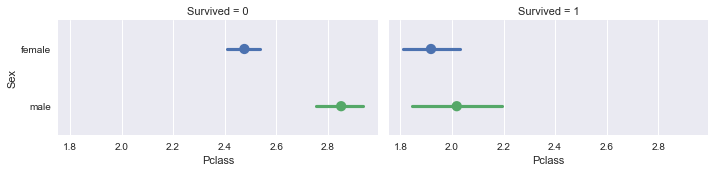

In [31]:
# Make pointplot to test the most important two featues

grid = sns.FacetGrid(titanic, col='Survived', size=2.5, aspect=2)
grid.map(sns.pointplot,'Pclass','Sex',palette='deep')
grid.add_legend()

#### In Summary
I choose the most two significant variables which contribute to a higher survival rate to summarize the conclusion. From the two graphs, we can conclude, Female or upper-class passengers (the left side) had a higher survival rate than lower-class male passengers (the lower right corner) in this Titanic disaster.

#### Limitations of the study

It's important to identify and acknowledge the limitation of the study.

1.	Correlation doesn't imply causation. The conclusions are merely based on the data set rather than controlled experiments.

2.	The dataset includes only 891 passenger information of the total 2224 passengers and crew; that sample size is not big enough. Besides, We don't know what percentage of the crew members in the 891 rows, which is a potential threat to the current conclusion. 

3.	The method I handling missing values is to delete them, which may be not a good way to handle missing data. 
